In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/2021.csv")

In [4]:
data["INTER"].mean()

1.2040816326530612

In [5]:
data.describe()

,W,FAM,BUS,RES,TEACH,SERV,SOC,MB,STR,IDLE,MISC,DESI,INTER
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,35.755102,8.367347,10.040816,5.489796,2.000000,2.408163,7.020408,12.428571,5.040816,16.938776,6.265306,1.204082
std,14.28869,16.612659,5.468447,6.987963,4.637359,1.968502,3.409047,3.412537,7.960842,4.756396,7.360956,5.667067,1.098855
min,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,25.000000,4.000000,4.000000,0.000000,0.000000,0.000000,5.000000,7.000000,2.000000,12.000000,1.000000,0.000000
50%,25.00000,33.000000,8.000000,10.000000,6.000000,1.000000,1.000000,7.000000,11.000000,4.000000,16.000000,5.000000,1.000000
75%,37.00000,40.000000,12.000000,15.000000,10.000000,4.000000,3.000000,9.000000,15.000000,7.000000,22.000000,11.000000,2.000000
max,49.00000,94.000000,24.000000,26.000000,14.000000,8.000000,15.000000,16.000000,50.000000,23.000000,37.000000,18.000000,4.000000


In [6]:
tot = 0
for k in data.keys():
    if k not in ["W", "INTER", "DESI"]:
        d = data[k][data[k]>0]
        #d = data[k]
        m = int(np.mean(d))
        s = int(np.mean(np.abs(d-m)))
        tot = tot + m
        print('{}\t {:d} +/- {:d}'.format(k, m, s))
print("TOTAL\t {:d}".format(tot))

FAM	 35 +/- 11
BUS	 8 +/- 4
RES	 10 +/- 5
TEACH	 7 +/- 2
SERV	 2 +/- 1
SOC	 4 +/- 2
MB	 7 +/- 2
STR	 12 +/- 5
IDLE	 5 +/- 3
MISC	 17 +/- 5
TOTAL	 107


In [7]:

def year_stats(year, category):
    #data = np.loadtxt("../data/{}.csv".format(year), delimiter=',', skiprows=1)
    #actos = {"WEEK":0, "RES":1, "TEACH":2, "SERVICE":3, "SOC":4, "MB":5, "STR":6, "IDLE":7, "MISC":8, "DESI":9}
    data = pd.read_csv("../data/{}.csv".format(year))
    #print(data)

    #total_hours = data[:,actos["RES"]] + data[:, actos["TEACH"]] + data[:, actos["SERVICE"]]
    #res_hours =  data[:,actos["RES"]]
    #desi_hours =  data[:,actos["DESI"]]
    
    total_hours = data["RES"] + data["TEACH"] 
    cat_hours = data[category]



    valid_weeks = total_hours>5
    n_valid_weeks = len(cat_hours[valid_weeks])
    total_cat_hours_week = cat_hours[valid_weeks].sum()/n_valid_weeks
    
    return {category:total_cat_hours_week}

In [10]:
cats = ['DESI', 'RES', 'IDLE', 'TEACH', 'MB', 'SERV', 'SOC', 'STR', 'MISC']

hours = {}

for c in cats:
    hours[c] = []

time = []
for i in range(2014,2024):
    time.append(i)
    
    for c in cats:
        a = year_stats(i,c)
        hours[c].append(a[c])

for c in cats:
    hours[c] = np.array(hours[c])


[42.61408163 42.75833333 43.17934783 39.87777778 38.58695652 36.42222222
 38.04       31.29268293 30.14444444 27.12804878] 14.787927538636524
[15.30102041 13.41666667 16.67391304 19.43333333 14.15217391 17.44444444
 16.6        11.68292683 11.83333333 11.34146341]
[11.40306122 12.546875   10.57065217  5.11111111  8.7826087   7.8
  9.74        6.56097561  7.65555556  6.66463415]


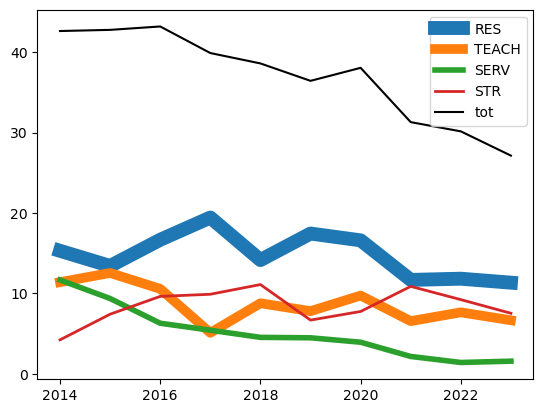

In [11]:
cat='RES'; plt.plot(time, hours[cat], linewidth=10,label=cat)
cat='TEACH'; plt.plot(time, hours[cat], linewidth=7,label=cat)
#cat='IDLE'; plt.plot(time, hours[cat], linewidth=6,label=cat)
cat='SERV'; plt.plot(time, hours[cat], linewidth=4,label=cat)
#cat='MB'; plt.plot(time, hours[cat], linewidth=3,label=cat)

#cat='SOC'; plt.plot(time, hours[cat], linewidth=2,label=cat)
cat='STR'; plt.plot(time, hours[cat], linewidth=2,label=cat)

#cat='MISC'; plt.plot(time, hours[cat], linewidth=2,label=cat)

tot = np.zeros(len(time))
for r in ['RES', 'TEACH', 'SERV', 'STR']:
    tot += hours[r]
plt.plot(time, tot, color='black', label='tot')
plt.legend()
print(tot, hours['RES'].mean())
print(hours['RES'])
print(hours['TEACH'])

In [12]:
activities = ['RES', 'TEACH', 'IDLE','MB', 'SERV', 'SOC', 'STR', 'MISC']
data = pd.read_csv("../data/2019.csv")
total = np.zeros(len(data['RES']))

for a in activities:
    total += data[a]

In [13]:
total.mean(), total.median()

(101.8936170212766, 103.0)

In [14]:
tot = 0
for a in activities:
    tot += data[a].median()
    print(a, data[a].median())
print(tot)

RES 16.0
TEACH 9.0
IDLE 7.0
MB 4.0
SERV 4.0
SOC 11.0
STR 6.0
MISC 38.0
95.0


In [15]:
tot = 0
for a in activities:
    tot += data[a].mean()
    print(a, data[a].mean())
print(tot)

RES 16.74468085106383
TEACH 7.553191489361702
IDLE 8.148936170212766
MB 4.361702127659575
SERV 4.297872340425532
SOC 15.914893617021276
STR 6.468085106382978
MISC 38.40425531914894
101.89361702127661


In [16]:
54+14+12+9+8+5+2+2+1+1

108

In [17]:
12+14+8+8+6+3+1+1+1

54

In [32]:
data['RES']

0     15.0
1     14.0
2     21.0
3     16.0
4     13.0
5     24.0
6     19.0
7     16.0
8     11.0
9     10.0
10    17.0
11    12.0
12     1.0
13    13.0
14    15.0
15    15.0
16    19.0
17    14.0
18     5.0
19    18.0
20    28.0
21    26.0
22    43.0
23    29.0
24    37.0
25    43.0
26    24.0
27    16.0
28    20.0
29    15.0
30    18.0
31    22.0
32    16.0
33    20.0
34    15.0
35    20.0
36    20.0
37    12.0
38    11.0
39    15.0
40    11.0
41     1.0
42    16.0
43     2.0
44     2.0
45     8.0
46     9.0
Name: RES, dtype: float64